## Imports

In [81]:
import pandas as pd
import pickle as pk
import plotly.express as px
from sklearn.metrics import roc_curve, auc

## Feature selection
### ST1

In [82]:
file = open("C:/repos/MTR/data/randomforest_no_standart.dat","rb")
base = pk.load(file)
file.close()
file = open("C:/repos/MTR/data/randomforest_with_standart.dat","rb")
sbase = pk.load(file)
file.close()

In [83]:
print("acuracy no standart by batch "+ str(base['acuracy']))
print("acuracy with standart by batch " + str(sbase['acuracy']) )

acuracy no standart by batch 0.6988829787234042
acuracy with standart by batch 0.7222340425531915


In [84]:
print("AUC no standart by batch "+ str(base['ROC']))
print("AUC with standart by batch " + str(sbase['ROC']) )

AUC no standart by batch 0.7586945278450363
AUC with standart by batch 0.7729553753026634


### ROC no standart by batch

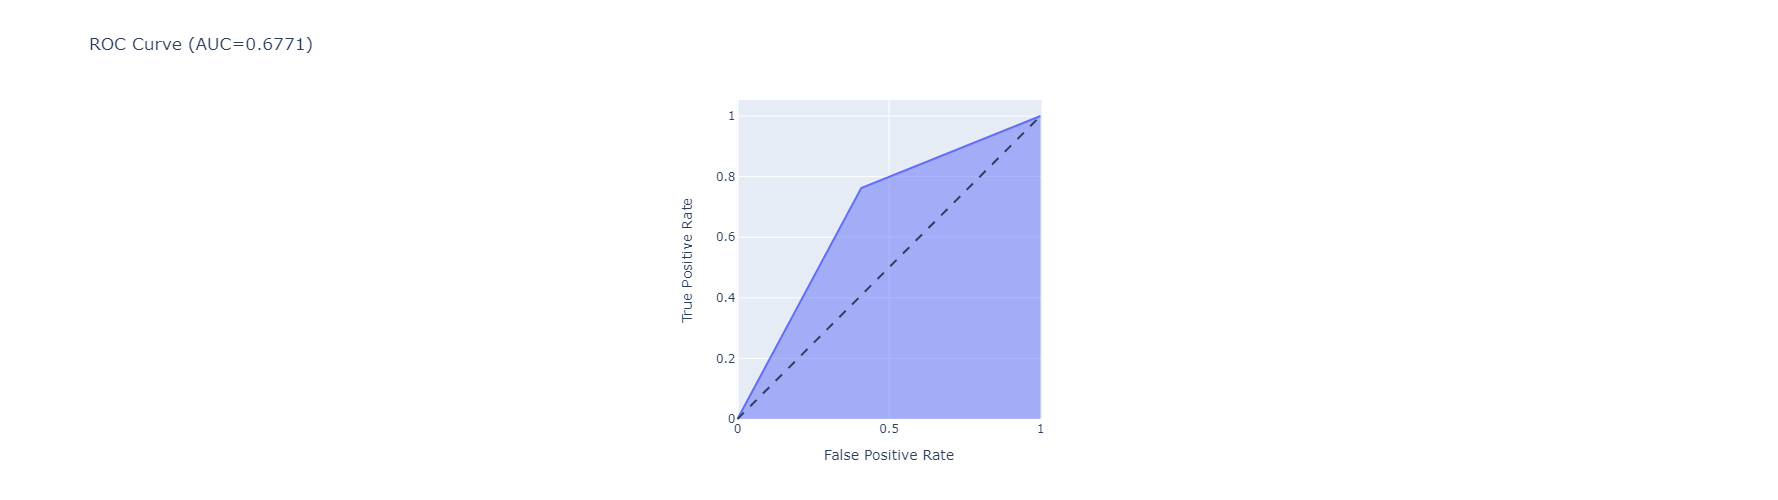

In [85]:
fpr, tpr, thresholds = roc_curve(base["y_t"], base["y_t_pred"])

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

### ROC with standart by batch

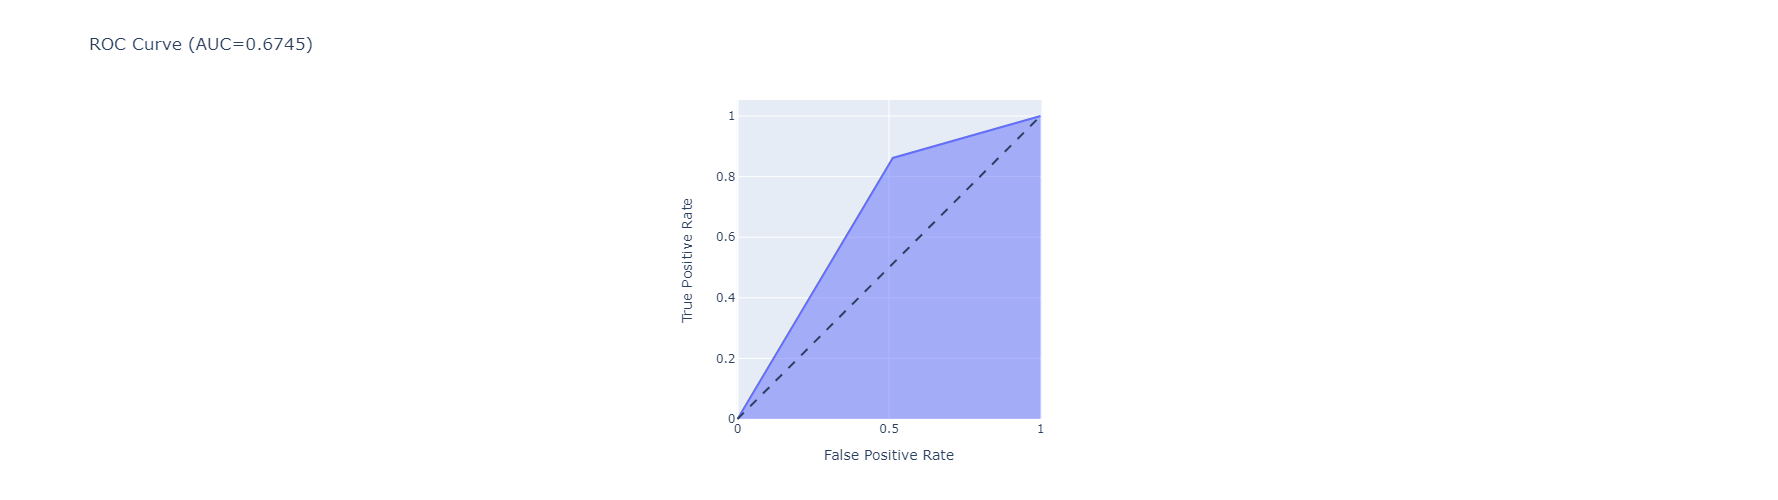

In [86]:
fpr, tpr, thresholds = roc_curve(sbase["y_t"], sbase["y_t_pred"])

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

### Importance of each mark for  no standart by batch

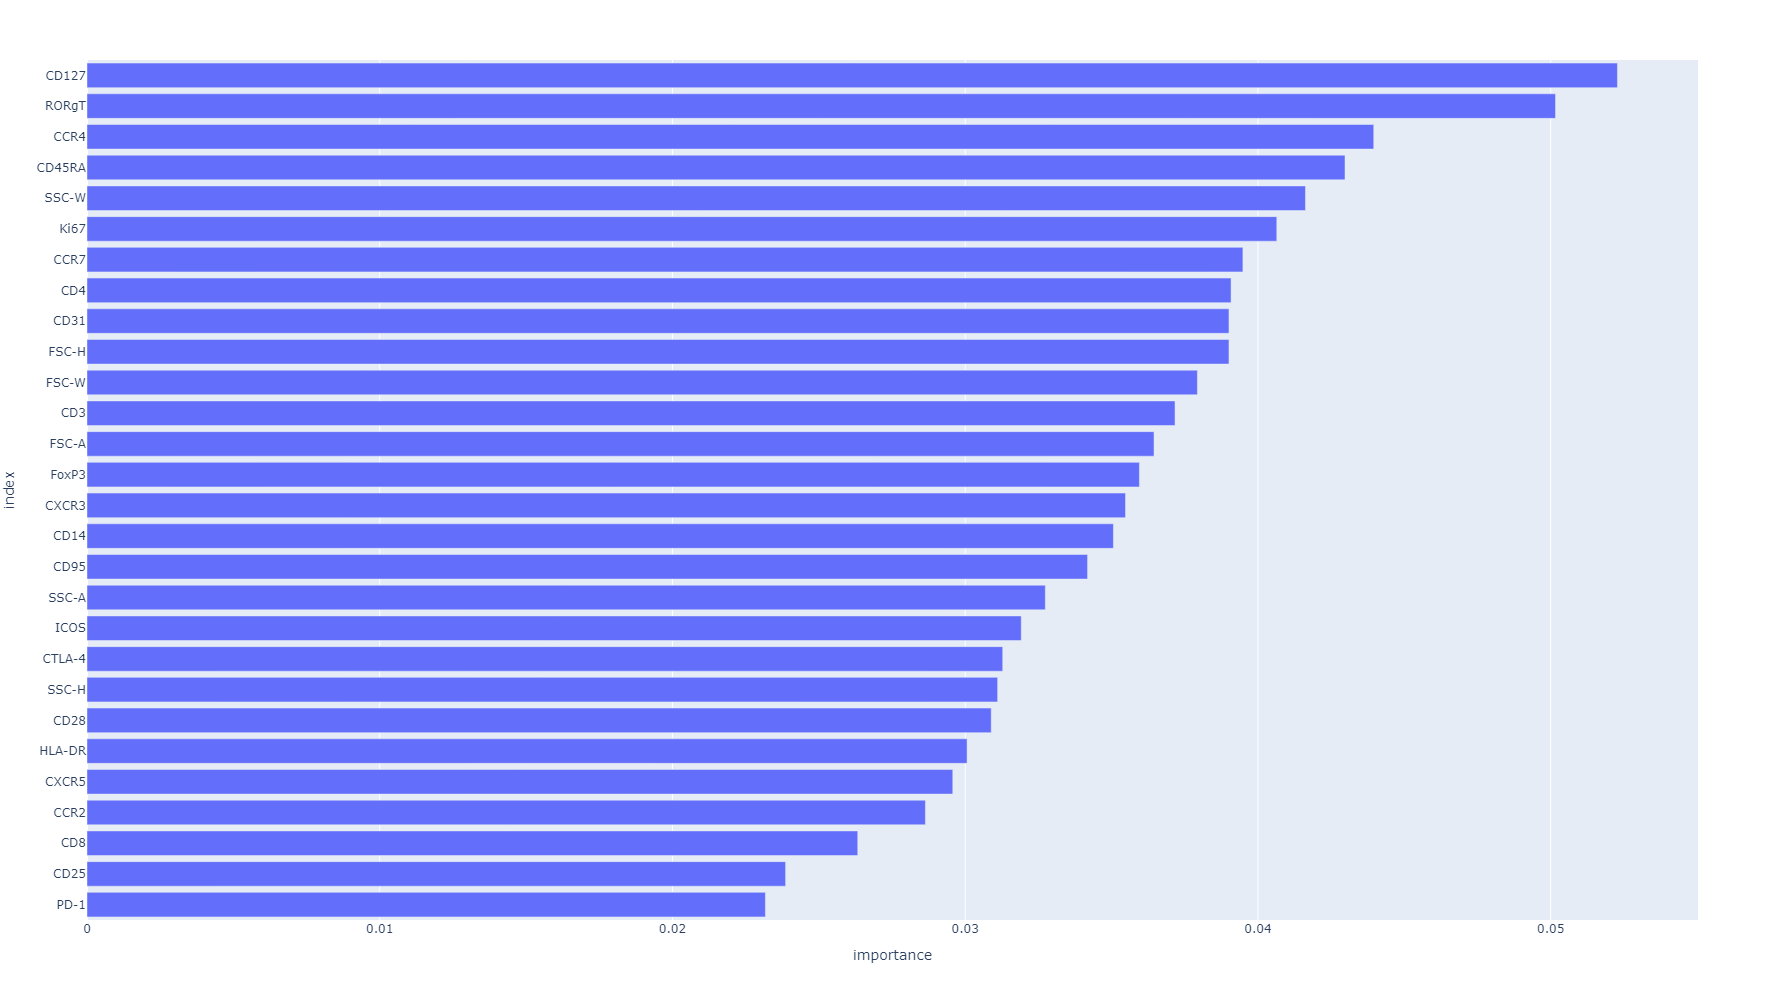

In [100]:
df = base["importance"]
df.index = df.mark
df.sort_values("importance",inplace=True)
fig = px.bar(df, x = "importance")
fig.update_layout(width = 800,height=1000)
fig.show()


### Importance of each mark for  with standart by batch

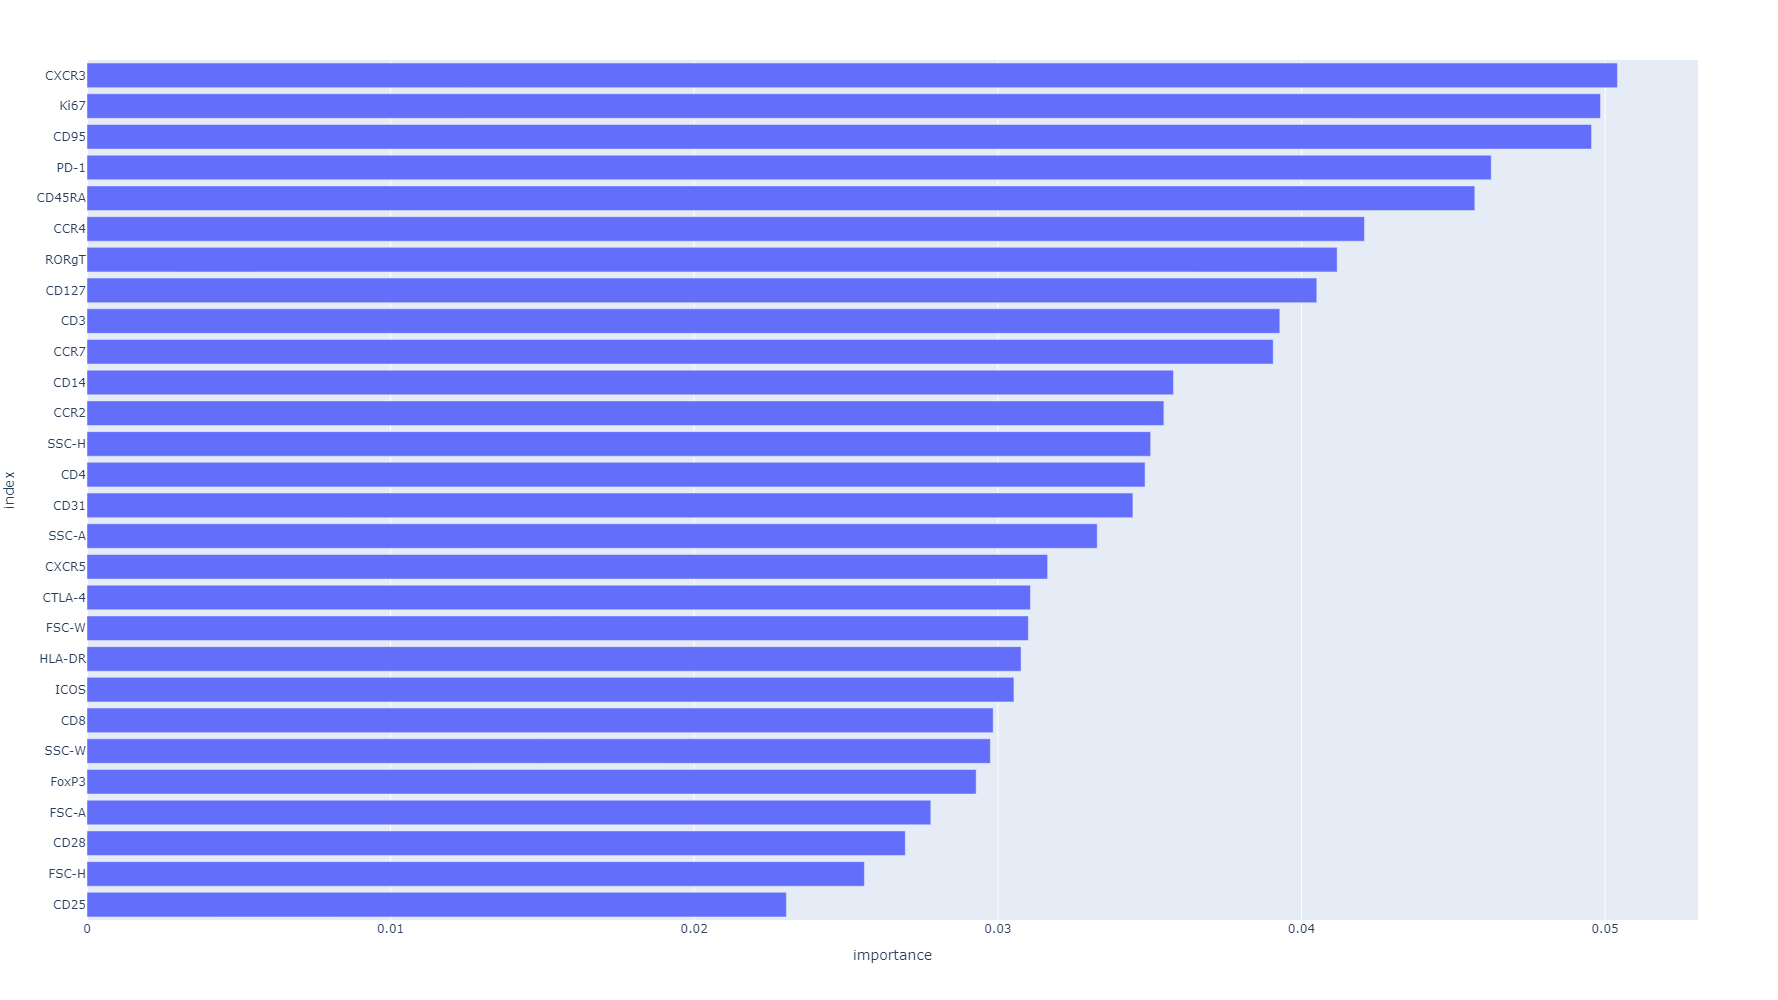

In [101]:
df = sbase["importance"]
df.index = df.mark
df.sort_values("importance",inplace=True)
fig = px.bar(df, x = "importance")
fig.update_layout(width = 800,height=1000)
fig.show()


In [75]:
df = pd.DataFrame(base["x"].copy())
df.columns = list(base["importance"]["mark"].copy())
df["y"] = base["y"]
df.to_csv("teste.csv",index=False)